## 주제 : 비디오게임 데이터를 통한 미래시장 예측과 판매 전략수립
 ### => 어떤 장르의 게임을 언제(시대) 어디서(지역, 플랫폼) 출시해야 안정적인 수익을 보장할 수 있을까?

### 1차 목표 : 장르별, 시대별, 대륙별 트렌드와 매출액을 파악하기

- 시대별 장르 선호도 변화는 어떠한가? (시대별 장르 트렌드 변화)
- 어떤 플랫폼에서 게임을 출시해야 하는가? (시대별 플랫폼 판매량)
- 어느 지역에 출시할 것인가? (대륙별 선호도)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import normaltest

In [4]:
df = pd.read_csv('./data/Video_Games(정제2).csv')

In [5]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_,EU_,JP_,Other_,Global_,C_Score,U_Score,Rating
0,SuperMarioWorld,SNES,1990,Platform,Nintendo,38.73,11.36,10.73,1.67,62.45,100.0,NaN,NaN
1,TheLegendofZelda:OcarinaofTime,N64,1998,Action,Nintendo,16.40,7.56,5.80,0.64,30.40,99.0,NaN,NaN
2,GrandTheftAutoIV,X360,2008,Action,Take-Two Interactive,45.07,20.47,0.93,6.87,73.40,98.0,7.9,M
3,GrandTheftAutoIV,PS3,2008,Action,Take-Two Interactive,31.73,24.60,2.93,10.73,70.00,98.0,7.5,M
4,TonyHawk'sProSkater2,PS,2000,Sports,Activision,13.26,6.13,0.09,0.87,20.35,98.0,7.7,T


In [6]:
print('  데이터 개수, 데이터 타입, 결측값 확인')
print(df.info())
print('\n 평균,최대,최소값 확인\n',df.describe())

  데이터 개수, 데이터 타입, 결측값 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       16715 non-null  object 
 1   Platform   16715 non-null  object 
 2   Year       16715 non-null  int64  
 3   Genre      16715 non-null  object 
 4   Publisher  16715 non-null  object 
 5   NA_        16715 non-null  float64
 6   EU_        16715 non-null  float64
 7   JP_        16715 non-null  float64
 8   Other_     16715 non-null  float64
 9   Global_    16715 non-null  float64
 10  C_Score    16715 non-null  float64
 11  U_Score    10014 non-null  object 
 12  Rating     9949 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.7+ MB
None

 평균,최대,최소값 확인
                Year           NA_           EU_           JP_        Other_  \
count  16715.000000  16715.000000  16715.000000  16715.000000  16715.000000   
mean    2006.469578      

In [7]:
newdf=df[['Genre', 'Global_']]
newdf.head(3)

,Genre,Global_
0,Platform,62.45
1,Action,30.40
2,Action,73.40


In [8]:
# pip install --upgrade category_encoders

In [9]:
target='Global_'
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(use_cat_names = True)
df_encoded = encoder.fit_transform(newdf)
df_encoded.head(3)

,Genre_Platform,Genre_Action,Genre_Sports,Genre_Fighting,Genre_Shooter,Genre_Role-Playing,Genre_Racing,Genre_Strategy,Genre_Misc,Genre_Adventure,Genre_Simulation,Genre_Puzzle,Global_
0,1,0,0,0,0,0,0,0,0,0,0,0,62.45
1,0,1,0,0,0,0,0,0,0,0,0,0,30.40
2,0,1,0,0,0,0,0,0,0,0,0,0,73.40


<AxesSubplot: title={'center': 'Global Sale Price'}, xlabel='Global_', ylabel='Density'>

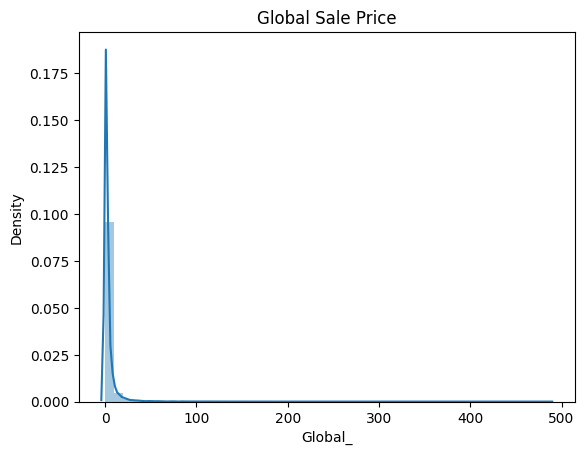

In [43]:
# 타겟값 분포도 확인
plt.title('Global Sale Price')
sns.distplot(df['Global_'])

### 데이터의 분포가 왼쪽으로 치우짐
    * 정규분포에서 벗어나 있음

In [44]:
# log1p 함수 사용 이유
compare = np.array([0,2.534])
print(np.log(compare))
# 변환대상값이 0이면 무한대값이 결과로 나오므로 사용불가임
# 변환할 데이터에 1을 더해서 log 변환
print(np.log(compare+1))
# log1p 함수는 직접 1을 더하지 않고 함수가 해결함
print(np.log1p(compare))

[      -inf 0.92979908]
[0.         1.26243037]
[0.         1.26243037]


<AxesSubplot: title={'center': 'Log Transformed Global Sale Price Histogram'}, xlabel='Global_', ylabel='Density'>

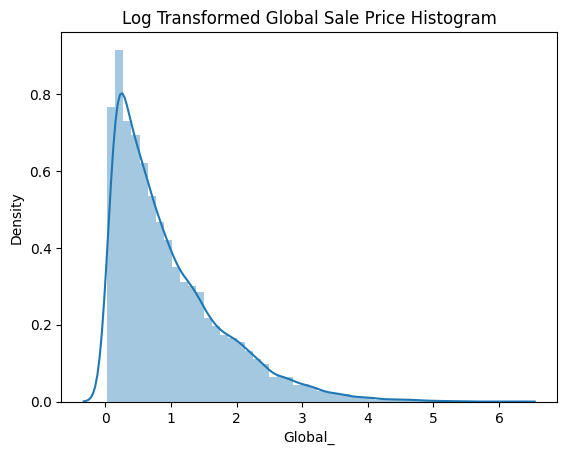

In [46]:
# 결과값을 로그 변환하고 다시 분포도 확인
plt.title('Log Transformed Global Sale Price Histogram')
log_SalePrice = np.log1p(df['Global_'])
sns.distplot(log_SalePrice)

In [47]:
# drop하지 않은 숫자형 Null 컬럼들은 평균값으로 대체
df.fillna(df.mean(),inplace=True)

In [50]:
# Null 값이 있는 피처명과 타입을 추출
null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df.dtypes[null_column_count.index])

## Null 피처의 Type :
 U_Score    object
Rating     object
dtype: object


In [52]:
print('get_dummies() 수행 전 데이터 Shape:', df.shape)
df_ohe = pd.get_dummies(df)
print('get_dummies() 수행 후 데이터 Shape:', df_ohe.shape )

get_dummies() 수행 전 데이터 Shape: (16715, 13)
get_dummies() 수행 후 데이터 Shape: (16715, 12301)


In [53]:
# Null 값이 있는 피처명과 타입을 추출
null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df_ohe.dtypes[null_column_count.index])

## Null 피처의 Type :
 Series([], dtype: object)


* df : 범주형변수에 대해 null값 처리 진행하지 않음, 원본그대로인 df
* df_ohe : 범주형 변수에 대해 더비변수화 진행. null도 하나의 범주로 처리

In [55]:
# 단일 모델의 RMSE 값 반환
def get_rmse(model): # 학습된 모델을 받아서 예측, 예측에 사용할 test 데이터는 전역변수에 저장되어 있음
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델의 RMSE 값 반환
def get_rmses(models) :
    rmses =[]
    for model in models : 
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

#### 게임 세일 데이터 세트 피처

    * Name : 게임 이름
    * Platform : 플랫폼
    * Year : 출시 년도
    * Genre : 장르
    * Publisher : 
    * NA_ : 북미 판매량
    * EU_ : 유럽 판매량
    * JP_ : 일본 판매량
    * Other_ : 그 외 지역 판매량
    * Global_ : 전체 판매량 (합계)
    * C_Score : 전문가 평점
    * U_Score : 사용자 평점
    * Rating  : 비율

In [56]:
## 데이터 분할
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타깃과 피처
y_target = df_ohe['Global_']
X_features = df_ohe.drop('Global_',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [57]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [58]:
df['Global_'].mean()

3.454358959018845

In [59]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)#학습된 모델 전달하고
# rmse값 반환

LinearRegression 로그 변환된 RMSE: 130132470.737
Ridge 로그 변환된 RMSE: 0.039
Lasso 로그 변환된 RMSE: 0.954


[130132470.73720028, 0.03929728583621995, 0.9541306541913109]

* 라쏘회귀가 타 회귀 방식보다 성능이 떨어진다.

In [60]:
def get_top_bottom_coef(model) :
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

In [61]:
# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

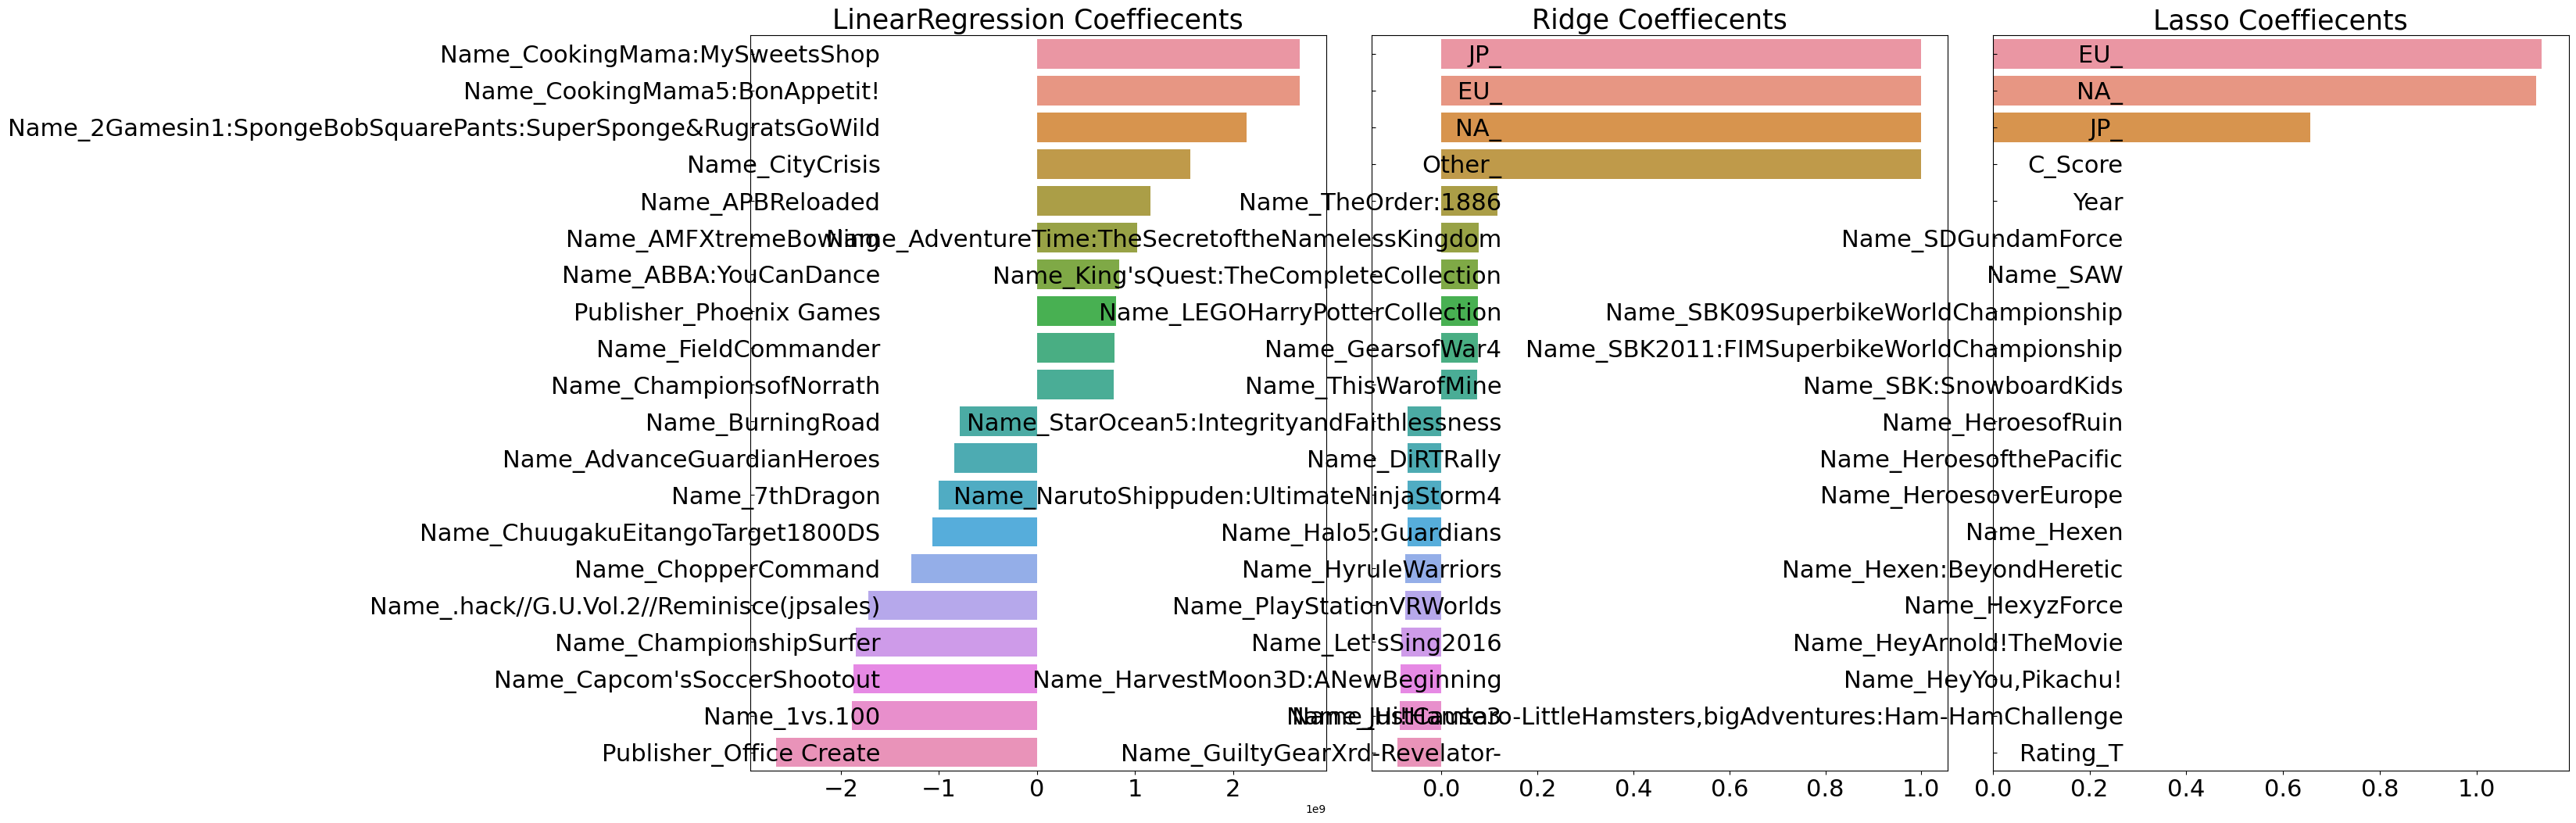

In [62]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [63]:
# 위쪽 코드에서 생성된 변수
X_features
y_target

0        62.45
1        30.40
2        73.40
3        70.00
4        20.35
         ...  
16710     0.04
16711     0.04
16712     0.04
16713     0.04
16714     0.03
Name: Global_, Length: 16715, dtype: float64

In [64]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models) :    
    for model in models :
        # 분할하지 않고 전체 데이터세트로 교차검증 수행
        rmse_list= np.sqrt(-cross_val_score(model,X_features,y_target,
                            scoring="neg_mean_squared_error",cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))        

In [65]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [6.10000000e-02 2.31602300e+07 5.98250076e+07 5.40000000e-02
 3.85538054e+07]
LinearRegression CV 평균 RMSE 값: 24307808.616

Ridge CV RMSE 값 리스트: [0.045 0.042 0.043 0.04  0.025]
Ridge CV 평균 RMSE 값: 0.039

Lasso CV RMSE 값 리스트: [2.827 0.534 0.441 0.705 0.146]
Lasso CV 평균 RMSE 값: 0.931


### 라쏘 모델이 다른 회귀 모델에 비해 성능이 떨어진다.
#### => 하이퍼파라미터 튜닝 후 재학습/예측 평가 하기

In [66]:
from sklearn.model_selection import GridSearchCV
# 모델과 하이퍼 파라미터 딕셔너리 객체를 받아서
# 최적화 작업의 결과를 표시하는 함수
# 릿지 모델과 라쏘 모델의 최적화 alpha 값 추출
def get_best_params(model, params):
    # GridSearchCV의 객체 인스턴스 생성
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features,y_target)
    # gv.best_score_ : 가장 평가가 좋은 평가점수
    # gv.best_params_ : 가장 평가가 좋았을때의 파라미터를 반환
    rmse = np.sqrt(-1 * grid_model.best_score_) 
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_# 최적 파라미터로 재학습된 모델 반환

In [67]:
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

In [68]:
best_ridge = get_best_params(ridge_reg,ridge_params )
best_lasso = get_best_params(lasso_reg,lasso_params )

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0385, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0388, 최적 alpha:{'alpha': 0.001}


### 결과
    * 릿지 모델 : alpha가 5에서 최적 평균 RMSE 가 0.0385
    * 라쏘 모델 : alpha가 0.001에서 최적 평균 RMSE가 0.0388
    * => 릿지 모델이 alpha를 최적화한 후에 예측성능이 0.039 -> 0.0385 로 향상되었다.
    * => 라쏘 모델이 alpha를 최적화한 후에 예측성능이 0.931 ->  0.0388 로 크게 향상되었다.

In [69]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [70]:
# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 130132470.737
Ridge 로그 변환된 RMSE: 0.037
Lasso 로그 변환된 RMSE: 0.037


[130132470.73720028, 0.03728285183779152, 0.037133206558636125]

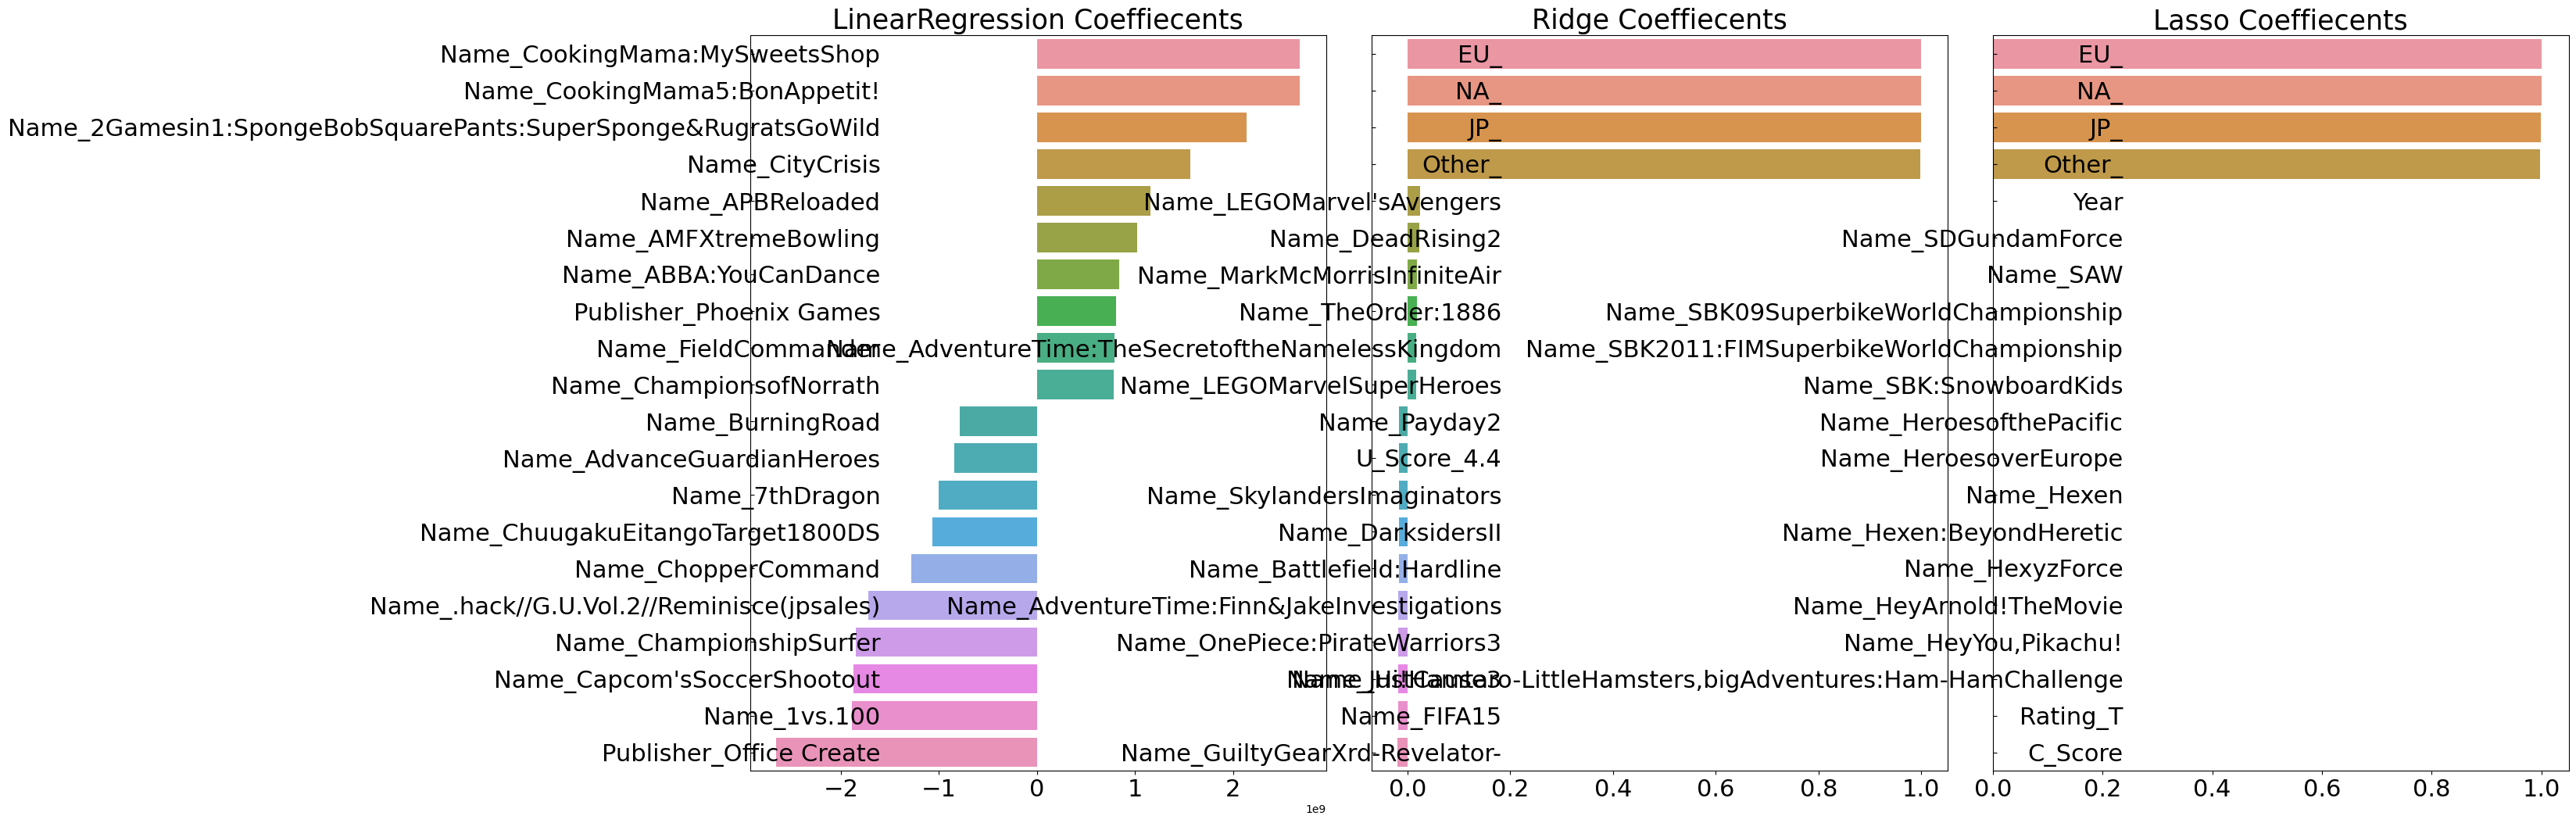

In [71]:
# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [72]:
from scipy.stats import skew

# 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외
# 원-핫-인코딩 적용되지 않은 house_df 사용
feautres_index = df.dtypes[df.dtypes != 'object'].index

In [73]:
feautres_index # dtype이 연속형인 data

Index(['Year', 'NA_', 'EU_', 'JP_', 'Other_', 'Global_', 'C_Score'], dtype='object')

In [75]:
skew_features = df[feautres_index].apply(lambda x : skew(x))

In [76]:
skew_features[:10]

Year       -1.030798
NA_        15.171235
EU_        15.139085
JP_        12.120600
Other_     17.248848
Global_    14.776307
C_Score    -0.627453
dtype: float64

In [77]:
#skew 정도가 1초과인  컬럼들만 추출
skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

# 일반적으로 skew() 함수의 반환값이 1이상인 경우 왜곡도가 높다고 판단하지만
# 상황에 따라 편차는 있음

Other_     17.248848
NA_        15.171235
EU_        15.139085
Global_    14.776307
JP_        12.120600
dtype: float64


In [78]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [80]:
# 로그 변환 후 다시 왜곡 정도를 확인해 보면
skew_features = df[feautres_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

# 여전히 왜곡 정도가 높은 피처가 있지만 더이상 로그변환 하더라도 개선하기 어렵다고 판단
# 그대로 유지하기로 결정

Other_     3.569558
JP_        3.110660
EU_        2.335955
NA_        1.642722
Global_    1.423503
dtype: float64


In [82]:
# Skew가 높은 피처들을 로그 변환 했으므로 
# 다시 원-핫 인코딩 적용 
# 피처/타겟 데이터 세트 다시 생성
# 최적 alpha 값과 RMSE 출력

# 원-핫 인코딩
df_ohe = pd.get_dummies(df)
# 피처/타겟 데이터 세트 다시 생성# 
y_target = df_ohe['Global_']
X_features = df_ohe.drop('Global_',axis=1, inplace=False)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [83]:
# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = get_best_params(ridge_reg,ridge_params)
best_lasso = get_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2375, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2422, 최적 alpha:{'alpha': 0.008}


In [84]:
# 분할된 학습/테스트 데이터를 이용해서
# 모델의 학습/예측/평가 및 모델별 회귀 계수 시각화

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.008)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.008)

In [85]:
# 모든 모델의 RMSE 출력 : 데이터가 log 변환 되었음
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# LinearRegression 로그 변환된 RMSE: 0.132
# Ridge 로그 변환된 RMSE: 0.125
# Lasso 로그 변환된 RMSE: 0.12

LinearRegression 로그 변환된 RMSE: 328687223.984
Ridge 로그 변환된 RMSE: 0.183
Lasso 로그 변환된 RMSE: 0.207


[328687223.98364794, 0.1833747123715398, 0.2073475864791486]

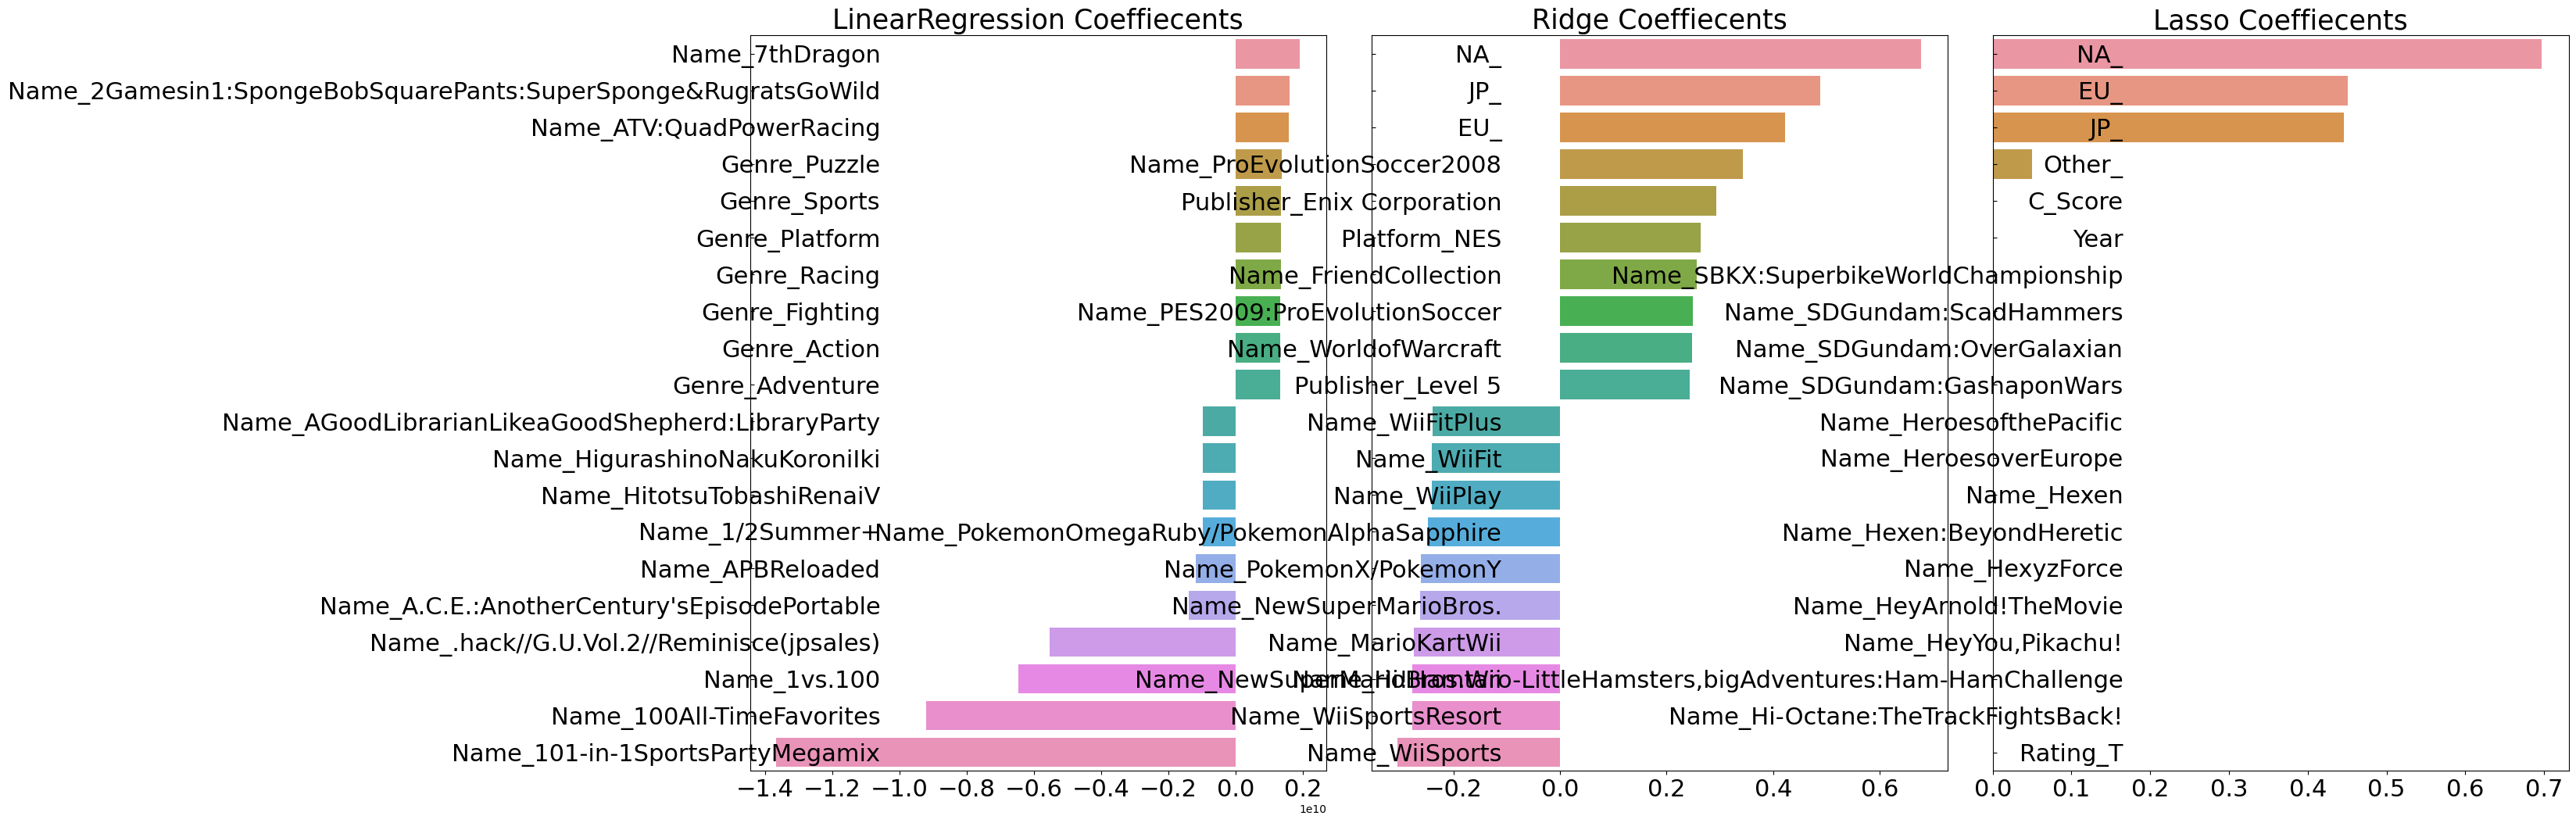

In [86]:
# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

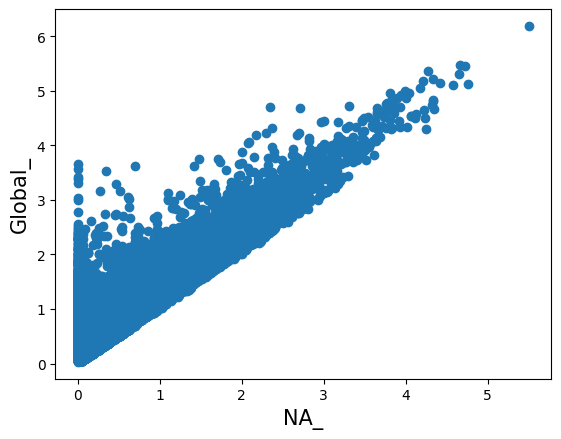

In [89]:
plt.scatter(x=df['NA_'], y = df['Global_'])
plt.ylabel('Global_', fontsize=15)
plt.xlabel('NA_', fontsize=15)
plt.show()

In [90]:
cond1 = df_ohe['NA_'] > np.log1p(5)
outlier_index =df_ohe[cond1].index

In [91]:
outlier_index

Int64Index([    0,     1,     2,     3,     4,     7,     8,     9,    10,
               11,
            ...
            12755, 12761, 12762, 12766, 12769, 12770, 12772, 12788, 12806,
            12807],
           dtype='int64', length=1205)

In [92]:
print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 df_ohe shape:', df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
df_ohe.drop(outlier_index,axis=0,inplace=True)
print('아웃라이어 삭제 후df_ohe shape:', df_ohe.shape)

아웃라이어 레코드 index : [    0     1     2 ... 12788 12806 12807]
아웃라이어 삭제 전 house_df_ohe shape: (16715, 12301)
아웃라이어 삭제 후 house_df_ohe shape: (15510, 12301)


In [93]:
# house_df_ohe 기반으로 피처/타깃 데이터 세트 다시 생성하고
# 릿지와 라쏘 모델의 최적화 수행
y_target = df_ohe['Global_']
X_features = df_ohe.drop('Global_',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [94]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1604, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1646, 최적 alpha:{'alpha': 0.001}


In [105]:
from sklearn.linear_model import Ridge

alphas = [0, 0.001, 0.01, 0.1, 1]

# Ridge의 경우 alpha값을 이와 같이 따로 따로 넣어주어야 함
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'Test MAE: ${mae:,.0f}')
  print(f'R2 Score: {r2:,.4f}\n')

Test MAE: $21,705,490,737,505
R2 Score: -3,678,671,738,090,749,728,963,690,496.0000

Test MAE: $0
R2 Score: 0.9247

Test MAE: $0
R2 Score: 0.9433

Test MAE: $0
R2 Score: 0.9535

Test MAE: $0
R2 Score: 0.9593



### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산

In [111]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)     # 정확도
    precision = precision_score(y_test, pred)    # 정밀도
    recall = recall_score(y_test, pred)         # 재현율
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}'.format(accuracy, precision, recall))

In [113]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import pandas as pd
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/Video_Games(정제2).csv')
y_titanic_df = titanic_df['Global_']
X_titanic_df= titanic_df.drop('Global_', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

NameError: name 'transform_features' is not defined